In [37]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import wave
import cv2
import random
import tensorflow as tf
import tensorflow.keras as keras
%matplotlib inline 

Récuperer les chemins des audios

In [2]:
import glob 
import os.path 

def listdirectory(path): 
    fichier=[] 
    l = glob.glob(path+'\\*') 
    for i in l: 
        if os.path.isdir(i): fichier.extend(listdirectory(i)) 
        else: fichier.append(i) 
    return fichier

In [3]:
#load blues
path_blues='C:\\Users\\USER\\Desktop\\Audio\\genres\\blues'
blues=listdirectory(path_blues)

#load classical
path_classical='C:\\Users\\USER\\Desktop\\Audio\\genres\\classical'
classical=listdirectory(path_classical)

#load country
path_country='C:\\Users\\USER\\Desktop\\Audio\\genres\\country'
country=listdirectory(path_country)

#load disco
path_disco='C:\\Users\\USER\\Desktop\\Audio\\genres\\disco'
disco=listdirectory(path_disco)

#load hiphop
path_hiphop='C:\\Users\\USER\\Desktop\\Audio\\genres\\hiphop'
hiphop=listdirectory(path_hiphop)

#load jazz
path_jazz='C:\\Users\\USER\\Desktop\\Audio\\genres\\jazz'
jazz=listdirectory(path_jazz)

#load metal
path_metal='C:\\Users\\USER\\Desktop\\Audio\\genres\\metal'
metal=listdirectory(path_metal)

#load pop
path_pop='C:\\Users\\USER\\Desktop\\Audio\\genres\\pop'
pop=listdirectory(path_pop)

#load reggae
path_reggae='C:\\Users\\USER\\Desktop\\Audio\\genres\\reggae'
reggae=listdirectory(path_reggae)

#load rock
path_rock='C:\\Users\\USER\\Desktop\\Audio\\genres\\rock'
rock=listdirectory(path_rock)

In [4]:
import pandas
lab=np.arange(10)
colmn = ['0']
for i in range(1, 100):
    colmn.append(str(i))
spect_ = ([blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock])
df_x = pandas.DataFrame(spect_, index = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], columns= colmn)
df_x

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
blues,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...,C:\Users\didin\Desktop\Projet Audio\genres\blu...
classical,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...,C:\Users\didin\Desktop\Projet Audio\genres\cla...
country,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...,C:\Users\didin\Desktop\Projet Audio\genres\cou...
disco,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...,C:\Users\didin\Desktop\Projet Audio\genres\dis...

Segmentation des audios pour augmenter la base des mfcc

In [5]:
def segmentation_mfcc(chemin,label): 
    a=0
    labels=[]
   
    mfcc=[]
    duree=30
    y, sr = librosa.load(chemin)
    max_len=int(duree*sr/10)
 
    for i in range(10):
        lmin=max_len*i
        lmax=lmin + max_len
        mfcc_ = librosa.feature.mfcc(y=y[lmin:lmax] , sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
        mfcc_ = mfcc_.T
        if (len(mfcc_)==130):
            mfcc.append(mfcc_ )
            labels.append(label)
    mfcc=np.array(mfcc)        
    return mfcc,labels


Segmentation des audios pour augmenter la base des mel

In [6]:
def segmentation_mel(chemin,label): 
    a=0
    k=0
    labels=[]
   
    mel=[]
    duree=30
    y, sr = librosa.load(chemin)
    max_len=int(duree*sr/10)
 
    for i in range(10):
        lmin=max_len*i
        lmax=lmin + max_len
        mel_ = librosa.feature.melspectrogram(y=y[lmin:lmax] , sr=sr, n_mels=13,n_fft=1024,hop_length=512)
        mel_ = mel_.T
        if (len(mel_)==130):
            mel.append(mel_ )
            a=a+1
            labels.append(label) 
    mel=np.array(mel)
    return mel,labels

creation de la base mfcc

In [7]:
base_mfcc=np.zeros((9996, 130, 13))
labels_mfcc=np.zeros(9996)
k=0
for i in range(np.shape(df_x)[0]):
        for j in range(np.shape(df_x)[1]):
                mfcc,lab=segmentation_mfcc(df_x.iloc[i,j],i)
                for l in range( mfcc.shape[0]):
                    base_mfcc[k,:,:]=mfcc[l,:,:]
                    labels_mfcc[k]=lab[l]
                    k+=1
print("base mfcc chargée")          

base mfcc chargée


creation de la base mel spectrogram

In [8]:
base_mel=np.zeros((9996, 130, 13))
labels_mel=np.zeros(9996)
k=0
for i in range(np.shape(df_x)[0]):
        for j in range(np.shape(df_x)[1]):
                mel,lab=segmentation_mel(df_x.iloc[i,j],i)
                for l in range( mel.shape[0]):
                    base_mel[k,:,:]=mel[l,:,:]
                    labels_mel[k]=lab[l]
                    k+=1
print("base mel chargée")    

base mel chargée


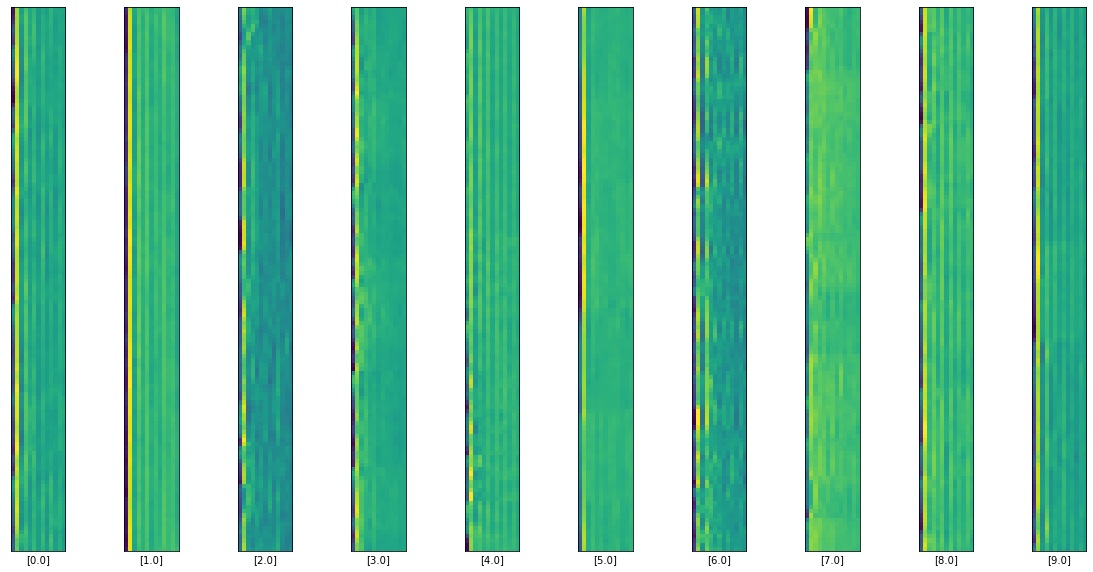

In [33]:
# visualiser une image pour chaque genre
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(base_mfcc[1000*i])
    plt.xlabel([labels_mfcc[1000*i]])
plt.show()

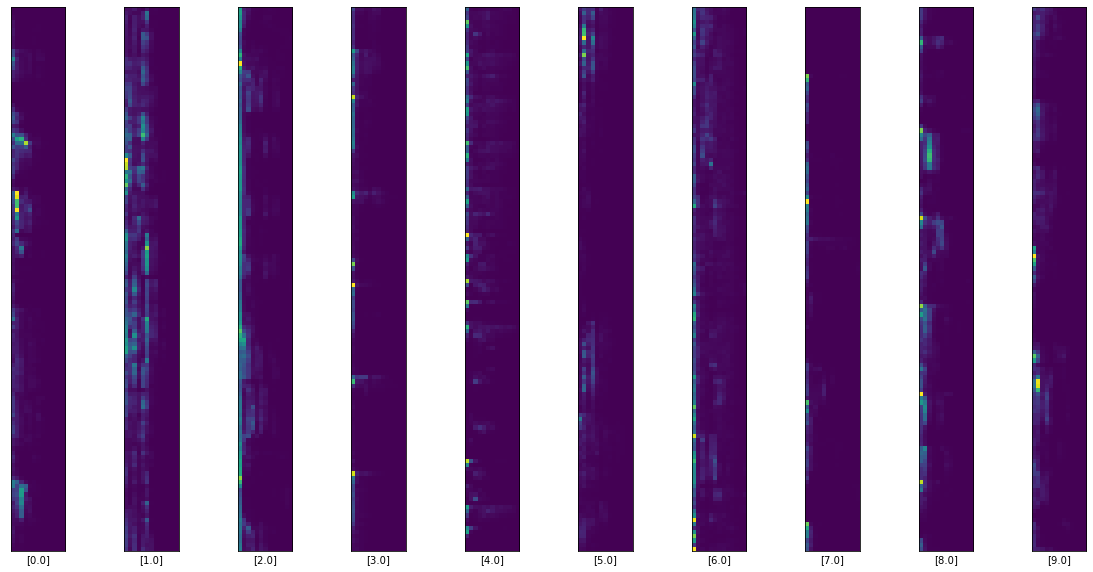

In [32]:
# visualiser une image pour chaque genre
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(base_mel[1000*i])
    plt.xlabel([labels_mel[1000*i]])
plt.show()

separation des données en base d apprentissage et de tests

In [9]:
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(base_mfcc, labels_mfcc, test_size=0.3)
X_train_mel, X_test_mel, y_train_mel, y_test_mel = train_test_split(base_mel, labels_mel, test_size=0.3)
print(X_train_mfcc.shape)
print(y_train_mfcc.shape)
print(X_test_mfcc.shape)
print(y_test_mfcc.shape)
print(X_train_mel.shape)
print(y_train_mel.shape)
print(X_test_mel.shape)
print(y_test_mel.shape)

(6997, 130, 13)
(6997,)
(2999, 130, 13)
(2999,)
(6997, 130, 13)
(6997,)
(2999, 130, 13)
(2999,)


Model simple avec des couches dense

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(X_train_mfcc.shape[1], X_train_mfcc.shape[2])))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


Apprentissage sur la base mfcc

In [11]:
history = model.fit(X_train_mfcc, y_train_mfcc, validation_split=0.3, batch_size=32, epochs=50)

Train on 4897 samples, validate on 2100 samples
Epoch 1/50
4897/4897 [==============================] - 4s 729us/sample - loss: 9.8606 - accuracy: 0.2971 - val_loss: 4.7035 - val_accuracy: 0.3448
Epoch 2/50
4897/4897 [==============================] - 1s 294us/sample - loss: 3.5295 - accuracy: 0.3788 - val_loss: 4.1732 - val_accuracy: 0.3200
Epoch 3/50
4897/4897 [==============================] - 1s 292us/sample - loss: 2.6057 - accuracy: 0.4405 - val_loss: 3.8148 - val_accuracy: 0.3662
Epoch 4/50
4897/4897 [==============================] - 1s 205us/sample - loss: 2.4216 - accuracy: 0.4711 - val_loss: 3.0451 - val_accuracy: 0.3843
Epoch 5/50
4897/4897 [==============================] - 1s 236us/sample - loss: 1.7082 - accuracy: 0.5411 - val_loss: 2.6407 - val_accuracy: 0.4057
Epoch 6/50
4897/4897 [==============================] - 1s 278us/sample - loss: 1.3588 - accuracy: 0.6036 - val_loss: 2.7867 - val_accuracy: 0.4157
Epoch 7/50
4897/4897 [==============================] - 1s 257us

fonction pour afficher la figure de l'accuracy

In [12]:
def affiche_acc(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

fonction pour afficher la figure de l'erreur

In [13]:
def affiche_loss(history):
    # summarize history for accuracy
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

figure de l'accuracy

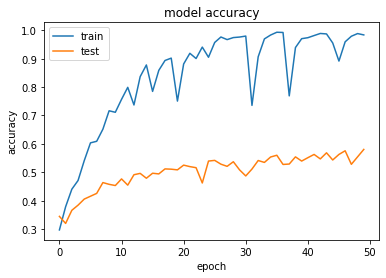

In [14]:
affiche_acc(history)

figure de l'erreur

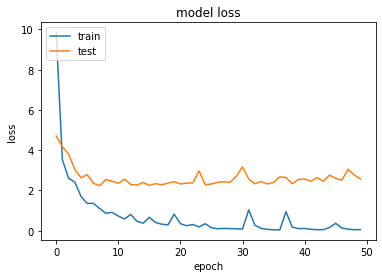

In [15]:
affiche_loss(history)

Evaluation sur la base de test mfcc

In [16]:
test_loss, test_acc = model.evaluate(X_test_mfcc,y_test_mfcc)
print('Test accuracy:', test_acc)

2999/2999 [==============================] - 0s 94us/sample - loss: 2.6014 - accuracy: 0.5759
Test accuracy: 0.5758586


redimensionner la base mfcc pour un model CNN

In [17]:
X_train_mfcc_2 = X_train_mfcc.reshape(X_train_mfcc.shape[0],X_train_mfcc.shape[1],X_train_mfcc.shape[2],1)
X_test_mfcc_2 = X_test_mfcc.reshape(X_test_mfcc.shape[0],X_test_mfcc.shape[1],X_test_mfcc.shape[2],1)

input_shape_mfcc = (X_train_mfcc_2.shape[1], X_train_mfcc_2.shape[2], 1)
print(X_train_mfcc_2.shape)
print(X_test_mfcc_2.shape)

(6997, 130, 13, 1)
(2999, 130, 13, 1)


architecture avec des CNN pour les mfcc

In [20]:
model_CNN_mfcc = keras.Sequential()

    # 1st conv layer
model_CNN_mfcc.add(keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape_mfcc))
model_CNN_mfcc.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_CNN_mfcc.add(keras.layers.BatchNormalization())

    # 2nd conv layer
model_CNN_mfcc.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_CNN_mfcc.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_CNN_mfcc.add(keras.layers.BatchNormalization())

    # 3rd conv layer
model_CNN_mfcc.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
model_CNN_mfcc.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_CNN_mfcc.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
model_CNN_mfcc.add(keras.layers.Flatten())
model_CNN_mfcc.add(keras.layers.Dense(256, activation='relu'))
model_CNN_mfcc.add(keras.layers.Dense(128, activation='relu'))
model_CNN_mfcc.add(keras.layers.Dense(64, activation='tanh'))
model_CNN_mfcc.add(keras.layers.Dense(32, activation='tanh'))
model_CNN_mfcc.add(keras.layers.Dropout(0.5))

    # output layer
model_CNN_mfcc.add(keras.layers.Dense(10, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_CNN_mfcc.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_CNN_mfcc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 11, 256)      2560      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 6, 256)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 6, 256)        1024      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 4, 256)        590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 2, 256)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 2, 256)        1024      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 1, 128)       

apprentissage avec le model CNN sur la base mfcc

In [21]:
history_CNN_mfcc = model_CNN_mfcc.fit(X_train_mfcc_2, y_train_mfcc, batch_size=32, validation_split = 0.3, epochs=50)

Train on 4897 samples, validate on 2100 samples
Epoch 1/50
4897/4897 [==============================] - 10s 2ms/sample - loss: 1.9248 - accuracy: 0.3257 - val_loss: 1.7181 - val_accuracy: 0.3862
Epoch 2/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.5504 - accuracy: 0.4599 - val_loss: 1.3580 - val_accuracy: 0.5538
Epoch 3/50
4897/4897 [==============================] - 7s 2ms/sample - loss: 1.3558 - accuracy: 0.5477 - val_loss: 1.2479 - val_accuracy: 0.5986
Epoch 4/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.2630 - accuracy: 0.5869 - val_loss: 1.1673 - val_accuracy: 0.6219
Epoch 5/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.1166 - accuracy: 0.6406 - val_loss: 1.1689 - val_accuracy: 0.6305
Epoch 6/50
4897/4897 [==============================] - 7s 2ms/sample - loss: 1.0308 - accuracy: 0.6786 - val_loss: 1.0126 - val_accuracy: 0.6862
Epoch 7/50
4897/4897 [==============================] - 7s 2ms/sample - los

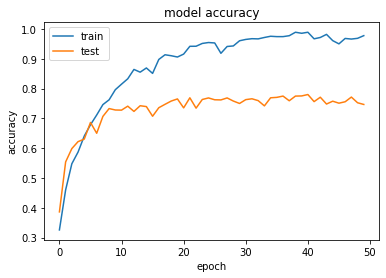

In [22]:
affiche_acc(history_CNN_mfcc)

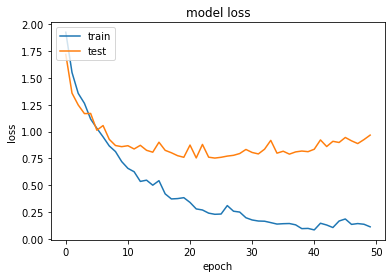

In [23]:
affiche_loss(history_CNN_mfcc)

evaluation du model CNN sur la base mfcc

In [24]:
test_loss, test_acc = model_CNN_mfcc.evaluate(X_test_mfcc_2,y_test_mfcc)
print('Test accuracy:', test_acc)

2999/2999 [==============================] - 2s 551us/sample - loss: 0.9188 - accuracy: 0.7569
Test accuracy: 0.75691897


matrice de confusion

In [68]:
prediction_mfcc=model_CNN_mfcc.predict(X_test_mfcc_2,batch_size=32)
prediction_mfcc.shape
y_pred_mfcc=[]
for i in range(len(prediction_mfcc)) :
    y_pred_mfcc.append(np.argmax(prediction_mfcc[i,:]))
confusion_metrics_mfcc=tf.math.confusion_matrix(y_test_mfcc,y_pred_mfcc)
print(np.round(np.array((confusion_metrics_mfcc/sum(confusion_metrics_mfcc))*100), 0))

[[84.  1.  2.  3.  1.  4.  6.  0.  1.  3.]
 [ 0. 92.  2.  0.  0.  4.  0.  0.  0.  0.]
 [ 7.  1. 76.  5.  1.  7.  2.  5.  3. 20.]
 [ 0.  0.  3. 70.  5.  1.  2.  5.  6.  8.]
 [ 3.  1.  1.  5. 73.  0.  5.  6.  6.  1.]
 [ 1.  5.  1.  0.  1. 78.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  0. 77.  0.  1.  6.]
 [ 0.  0.  4.  2.  6.  1.  0. 75.  3.  2.]
 [ 0.  0.  2.  7. 10.  1.  1.  3. 74.  2.]
 [ 3.  0. 10.  8.  3.  4.  8.  5.  4. 57.]]


redimensionner la base mel pour un model CNN

In [25]:
X_train_mel_2 = X_train_mel.reshape(X_train_mel.shape[0],X_train_mel.shape[1],X_train_mel.shape[2],1)
X_test_mel_2 = X_test_mel.reshape(X_test_mel.shape[0],X_test_mel.shape[1],X_test_mel.shape[2],1)

input_shape_mel = (X_train_mel_2.shape[1], X_train_mel_2.shape[2], 1)

architecture avec des CNN pour les mel

In [27]:
model_CNN_mel = keras.Sequential()

    # 1st conv layer
model_CNN_mel.add(keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=input_shape_mel))
model_CNN_mel.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_CNN_mel.add(keras.layers.BatchNormalization())

    # 2nd conv layer
model_CNN_mel.add(keras.layers.Conv2D(256, (3, 3), activation='relu'))
model_CNN_mel.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_CNN_mel.add(keras.layers.BatchNormalization())

    # 3rd conv layer
model_CNN_mel.add(keras.layers.Conv2D(128, (2, 2), activation='relu'))
model_CNN_mel.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_CNN_mel.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
model_CNN_mel.add(keras.layers.Flatten())
model_CNN_mel.add(keras.layers.Dense(256, activation='relu'))
model_CNN_mel.add(keras.layers.Dense(128, activation='relu'))
model_CNN_mel.add(keras.layers.Dense(64, activation='tanh'))
model_CNN_mel.add(keras.layers.Dense(32, activation='tanh'))
model_CNN_mel.add(keras.layers.Dropout(0.5))

    # output layer
model_CNN_mel.add(keras.layers.Dense(10, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_CNN_mel.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_CNN_mel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 11, 256)      2560      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 256)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 6, 256)        1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 4, 256)        590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 256)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 2, 256)        1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 1, 128)       

apprentissage avec le model CNN sur la base mel

In [28]:
history_CNN_mel = model_CNN_mel.fit(X_train_mel_2, y_train_mel, batch_size=32, validation_split = 0.3, epochs=50)

Train on 4897 samples, validate on 2100 samples
Epoch 1/50
4897/4897 [==============================] - 10s 2ms/sample - loss: 2.2014 - accuracy: 0.2261 - val_loss: 2.3939 - val_accuracy: 0.1295
Epoch 2/50
4897/4897 [==============================] - 7s 1ms/sample - loss: 1.9293 - accuracy: 0.3259 - val_loss: 1.9739 - val_accuracy: 0.2905
Epoch 3/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.7801 - accuracy: 0.3947 - val_loss: 1.7917 - val_accuracy: 0.3690
Epoch 4/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.6500 - accuracy: 0.4280 - val_loss: 1.6204 - val_accuracy: 0.4424
Epoch 5/50
4897/4897 [==============================] - 7s 2ms/sample - loss: 1.5297 - accuracy: 0.4815 - val_loss: 1.6069 - val_accuracy: 0.4510
Epoch 6/50
4897/4897 [==============================] - 8s 2ms/sample - loss: 1.4868 - accuracy: 0.5072 - val_loss: 1.6530 - val_accuracy: 0.4100
Epoch 7/50
4897/4897 [==============================] - 8s 2ms/sample - los

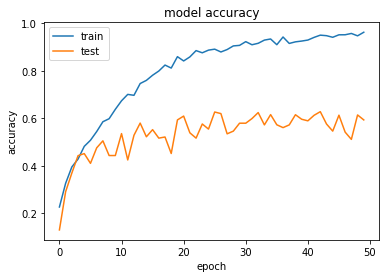

In [29]:
affiche_acc(history_CNN_mel)

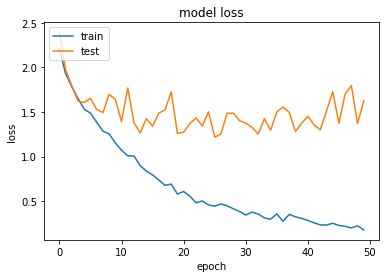

In [30]:
affiche_loss(history_CNN_mel)

evaluation du model CNN sur la base mel

In [31]:
test_loss_mel, test_acc_mel = model_CNN_mel.evaluate(X_test_mel_2,y_test_mel)
print('Test accuracy:', test_acc)

2999/2999 [==============================] - ETA: 0s - loss: 1.6244 - accuracy: 0.58 - 2s 501us/sample - loss: 1.6282 - accuracy: 0.5865
Test accuracy: 0.75691897


matrice de confusion

In [69]:
prediction_mel=model_CNN_mel.predict(X_test_mel_2,batch_size=32)
prediction_mel.shape
y_pred_mel=[]
for i in range(len(prediction_mel)) :
    y_pred_mel.append(np.argmax(prediction_mel[i,:]))
confusion_metrics_mel=tf.math.confusion_matrix(y_test_mel,y_pred_mel)
print(np.round(np.array((confusion_metrics_mel/sum(confusion_metrics_mel))*100), 0))

[[53.  3. 12.  4.  2.  6.  3.  3.  5.  6.]
 [ 1. 47.  1.  0.  0.  2.  0.  0.  0.  2.]
 [ 9.  6. 58.  3.  1. 10.  2.  5.  5. 12.]
 [ 6.  3.  2. 56.  5.  1.  2. 10.  3.  7.]
 [ 2.  1.  0.  5. 61.  0.  4.  9.  5.  3.]
 [ 4. 22.  4.  0.  0. 67.  0.  0.  1.  0.]
 [ 2.  2.  2.  2.  5.  3. 82.  1.  0. 19.]
 [ 6.  2.  6. 10.  8.  2.  0. 64.  5.  7.]
 [ 7.  4.  4. 10. 13.  1.  0.  5. 71.  4.]
 [11.  9. 11. 10.  4.  6.  7.  4.  5. 41.]]
